In [80]:
from sklearn import datasets
import numpy as np

np.set_printoptions(precision=4)
np.random.seed(462)

iris = datasets.load_iris()

import matplotlib.pyplot as plt

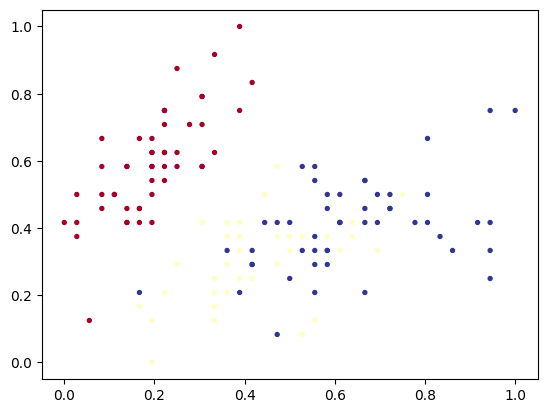

In [81]:
from sklearn.model_selection import train_test_split

# target class numbers
SETOSA = 0
VERSICOLOR = 1
VIRGINICA = 2

X = np.array(iris["data"][:, :2], dtype=np.float64)  # only sepal width and sepal length
y = np.array(iris["target"], dtype=np.float64)  # outputs
original_y = y.copy()


for i in range(X.shape[1]):
    X[:, i] = (X[:, i] - X[:, i].min()) / (X[:, i].max() - X[:, i].min())

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=8, cmap=plt.cm.RdYlBu)
plt.show()

for i in range(y.shape[0]):  # these are either VERSICOLOR or not
    y[i] = 1.0 if y[i] == VERSICOLOR else -1.0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=462
)

In [82]:
class AdaLine:
    def __init__(self, X_train, X_test, y_train, y_test) -> None:
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        self._weights = np.random.random(
            self.X_train.shape[1]
        )  # number of features == number of weights
        self._biases = np.random.random()  # just one bias as there is one layer

    def fit(self, alpha: float, max_loss: float, epochs: int):
        losses = []
        test_losses = []

        for epoch in range(epochs):
            test_errors = []
            errors = []
            for i in range(self.X_train.shape[0]):
                unactivated_pred = np.dot(self._weights, self.X_train[i]) + self._biases
                y_pred = 1.0 if unactivated_pred >= 0 else -1.0

                error = 0.5 * ((self.y_train[i] - y_pred) ** 2)
                errors.append(error)

                self._weights += alpha * (self.y_train[i] - y_pred) * self.X_train[i]
                self._biases += alpha * (self.y_train[i] - y_pred)
            loss = np.mean(errors)
            losses.append(loss)

            if loss < max_loss:
                print(f"Done, Epochs: {epoch} | Loss: {loss}")
                break
            for i in range(self.X_test.shape[0]):
                unactivated_test_pred = (
                    np.dot(self._weights, self.X_test[i]) + self._biases
                )

                test_pred = 1.0 if unactivated_test_pred >= 0 else -1.0

                test_error = 0.5 * ((self.y_test[i] - test_pred) ** 2)
                test_errors.append(test_error)
            test_loss = np.mean(test_errors)
            test_losses.append(test_loss)
            if epoch % int(epochs / 10) == 0:
                print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

        return losses, test_losses

    def predict(self, X):
        y = []
        for i in range(X.shape[0]):
            unactivated = np.dot(X[i], self._weights) + self._biases
            test_prediction = 1.0 if unactivated >= 0 else -1.0
            y.append(test_prediction)
        return np.array(y)


model = AdaLine(X_train, X_test, y_train, y_test)

Epoch: 0 | Loss: 1.34 | Test Loss: 1.32
Epoch: 10 | Loss: 1.08 | Test Loss: 1.2
Epoch: 20 | Loss: 1.06 | Test Loss: 1.16
Epoch: 30 | Loss: 1.02 | Test Loss: 1.08
Epoch: 40 | Loss: 0.96 | Test Loss: 1.04
Epoch: 50 | Loss: 0.68 | Test Loss: 0.64
Epoch: 60 | Loss: 0.64 | Test Loss: 0.68
Epoch: 70 | Loss: 0.64 | Test Loss: 0.56
Epoch: 80 | Loss: 0.64 | Test Loss: 0.64
Epoch: 90 | Loss: 0.64 | Test Loss: 0.56
TP = 15 TN = 22 FP = 11 FN = 2
Accuracy: 0.74
Precision: 0.5769230769230769
Recall: 0.8823529411764706


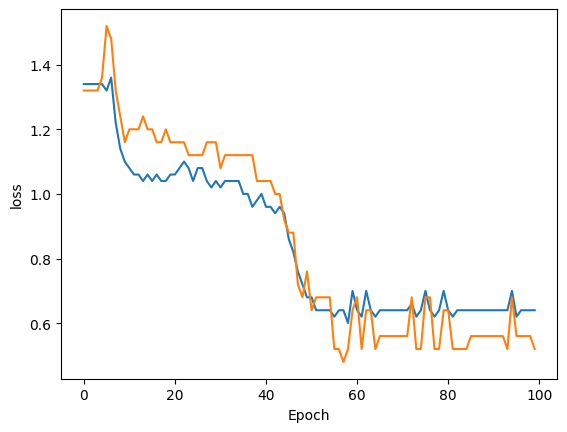

In [83]:
alpha = 0.001
max_loss = 0.02
epochs = 100

losses, test_losses = model.fit(alpha, max_loss, epochs)
test_pred = model.predict(X_test)

TP = TN = FP = FN = 0
for i in range(len(test_pred)):
    if test_pred[i] == y_test[i] and test_pred[i] == VERSICOLOR:
        TP += 1
    elif test_pred[i] == y_test[i] and test_pred[i] != VERSICOLOR:
        TN += 1
    elif test_pred[i] != y_test[i] and test_pred[i] == VERSICOLOR:
        FP += 1
    else:
        FN += 1

accuracy = (test_pred == y_test).sum() / len(y_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f"TP = {TP} TN = {TN} FP = {FP} FN = {FN}")
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}")

plt.plot(losses)
plt.plot(test_losses)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

(-2.0, 2.0)

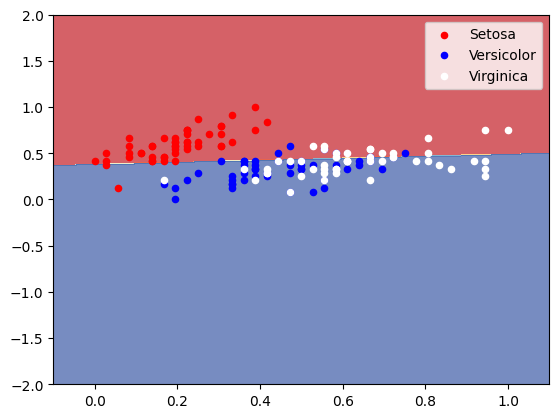

In [84]:
xx, yy = np.meshgrid(
    np.linspace(X.min() - 0.1, X.max() + 0.1, 500),
    np.linspace(y.min() - 1, y.max() + 1, 500),
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = model.predict(x_in)
y_pred = np.round(y_pred).reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(
    X[original_y == SETOSA][:, 0],
    X[original_y == SETOSA][:, 1],
    s=20,
    color="red",
    label='Setosa'
)
plt.scatter(
    X[original_y == VERSICOLOR][:, 0],
    X[original_y == VERSICOLOR][:, 1],
    s=20,
    color="blue",
    label='Versicolor'
)
plt.scatter(
    X[original_y == VIRGINICA][:, 0],
    X[original_y == VIRGINICA][:, 1],
    s=20,
    color="white",
    label='Virginica'
)
plt.legend()

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())